<a href="https://colab.research.google.com/github/Wishva23/Projects-Guvi_project/blob/main/E_Commerce_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
import datetime, nltk, warnings
from nltk.stem import PorterStemmer
%matplotlib inline

In [2]:
df = pd.read_csv('ecommerce.csv',encoding= 'unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
df.shape

(541909, 8)

In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
(df.Description.isnull().sum()*100)/df.shape[0]

0.2683107311375157

In [6]:
df.dropna(axis = 0, subset = ['Description'], inplace = True)

In [7]:
(df.CustomerID.isnull().sum()*100)/df.shape[0]

24.724722687365276

In [8]:
df.dropna(axis = 0, subset = ['CustomerID'], inplace = True)

In [9]:
df.CustomerID.value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [10]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


##Encoding-NPL

Removing punctuation (.!<>{}’,”(/)-)

In [14]:
df['processed_Description'] = df['Description'].str.replace("[^a-zA-Z]", " ")

<ipython-input-14-de5bcbcb75a0>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['processed_Description'] = df['Description'].str.replace("[^a-zA-Z]", " ")


In [15]:
df['processed_Description']

0          WHITE HANGING HEART T LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART 
                         ...                 
541904            PACK OF    SPACEBOY NAPKINS
541905           CHILDREN S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET   PIECE RETROSPOT 
Name: processed_Description, Length: 406829, dtype: object

Replacing short words

In [16]:
df['processed_Description']

0          WHITE HANGING HEART T LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART 
                         ...                 
541904            PACK OF    SPACEBOY NAPKINS
541905           CHILDREN S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET   PIECE RETROSPOT 
Name: processed_Description, Length: 406829, dtype: object

In [17]:
df['processed_Description'] = df['processed_Description'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))

LowerCase character

In [18]:
df['processed_Description'] = [row.lower() for row in df['processed_Description']]

In [19]:
df['processed_Description']

0            white hanging heart light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4               red woolly hottie white heart
                         ...                 
541904                  pack spaceboy napkins
541905              children apron dolly girl
541906           childrens cutlery dolly girl
541907        childrens cutlery circus parade
541908             baking set piece retrospot
Name: processed_Description, Length: 406829, dtype: object

Remove stop words

In [20]:
# Removing Stopwords Begin
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')

# # Making custom list of words to be removed 
# add_words = ['red','blue','pink','white','black','dark','pack','yellow','orange']

# # Adding to the list of words
# stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(rev):
    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
df['processed_Description'] = [remove_stopwords(r) for r in df['processed_Description']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
df['processed_Description']

0            white hanging heart light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4               red woolly hottie white heart
                         ...                 
541904                  pack spaceboy napkins
541905              children apron dolly girl
541906           childrens cutlery dolly girl
541907        childrens cutlery circus parade
541908             baking set piece retrospot
Name: processed_Description, Length: 406829, dtype: object

Lemmatization

In [22]:
# Begin Lemmatization 
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['processed_Description'] = df['processed_Description'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [23]:
df['processed_Description']

0            white hang heart light holder
1                      white metal lantern
2            cream cupid heart coat hanger
3         knit union flag hot water bottle
4            red woolly hottie white heart
                        ...               
541904                pack spaceboy napkin
541905              child apron dolly girl
541906        childrens cutlery dolly girl
541907     childrens cutlery circus parade
541908            bake set piece retrospot
Name: processed_Description, Length: 406829, dtype: object

In [24]:
df1 = df['processed_Description'].drop_duplicates()

In [25]:
df1 = pd.DataFrame(df1)

In [26]:
df1

,processed_Description
0,white hang heart light holder
1,white metal lantern
2,cream cupid heart coat hanger
3,knit union flag hot water bottle
4,red woolly hottie white heart
...,...
503602,set ribbon perfectly pretty
504104,set ribbon party
530382,pink crystal skull phone charm
537621,cream hang heart light holder


Plotting frequent words

['white', 'hang', 'heart', 'light', 'holder', 'white', 'metal', 'lantern', 'cream', 'cupid', 'heart', 'coat', 'hanger', 'knit', 'union', 'flag', 'hot', 'water', 'bottle', 'red', 'woolly', 'hottie', 'white', 'heart', 'set', 'babushka', 'nesting', 'box', 'glass', 'star', 'frost', 'light', 'holder', 'hand', 'warmer', 'union', 'jack', 'hand', 'warmer', 'red', 'polka', 'dot', 'assort', 'colour', 'bird', 'ornament', 'poppy', 'playhouse', 'bedroom', 'poppy', 'playhouse', 'kitchen', 'feltcraft', 'princess', 'charlotte', 'doll', 'ivory', 'knit', 'mug', 'cosy', 'box', 'assort', 'colour', 'teaspoon', 'box', 'vintage', 'jigsaw', 'block', 'box', 'vintage', 'alphabet', 'block', 'home', 'building', 'block', 'word', 'love', 'building', 'block', 'word', 'recipe', 'box', 'metal', 'heart', 'doormat', 'new', 'england', 'jam', 'making', 'set', 'jar', 'red', 'coat', 'rack', 'paris', 'fashion', 'yellow', 'coat', 'rack', 'paris', 'fashion', 'blue', 'coat', 'rack', 'paris', 'fashion', 'bath', 'building', 'bloc

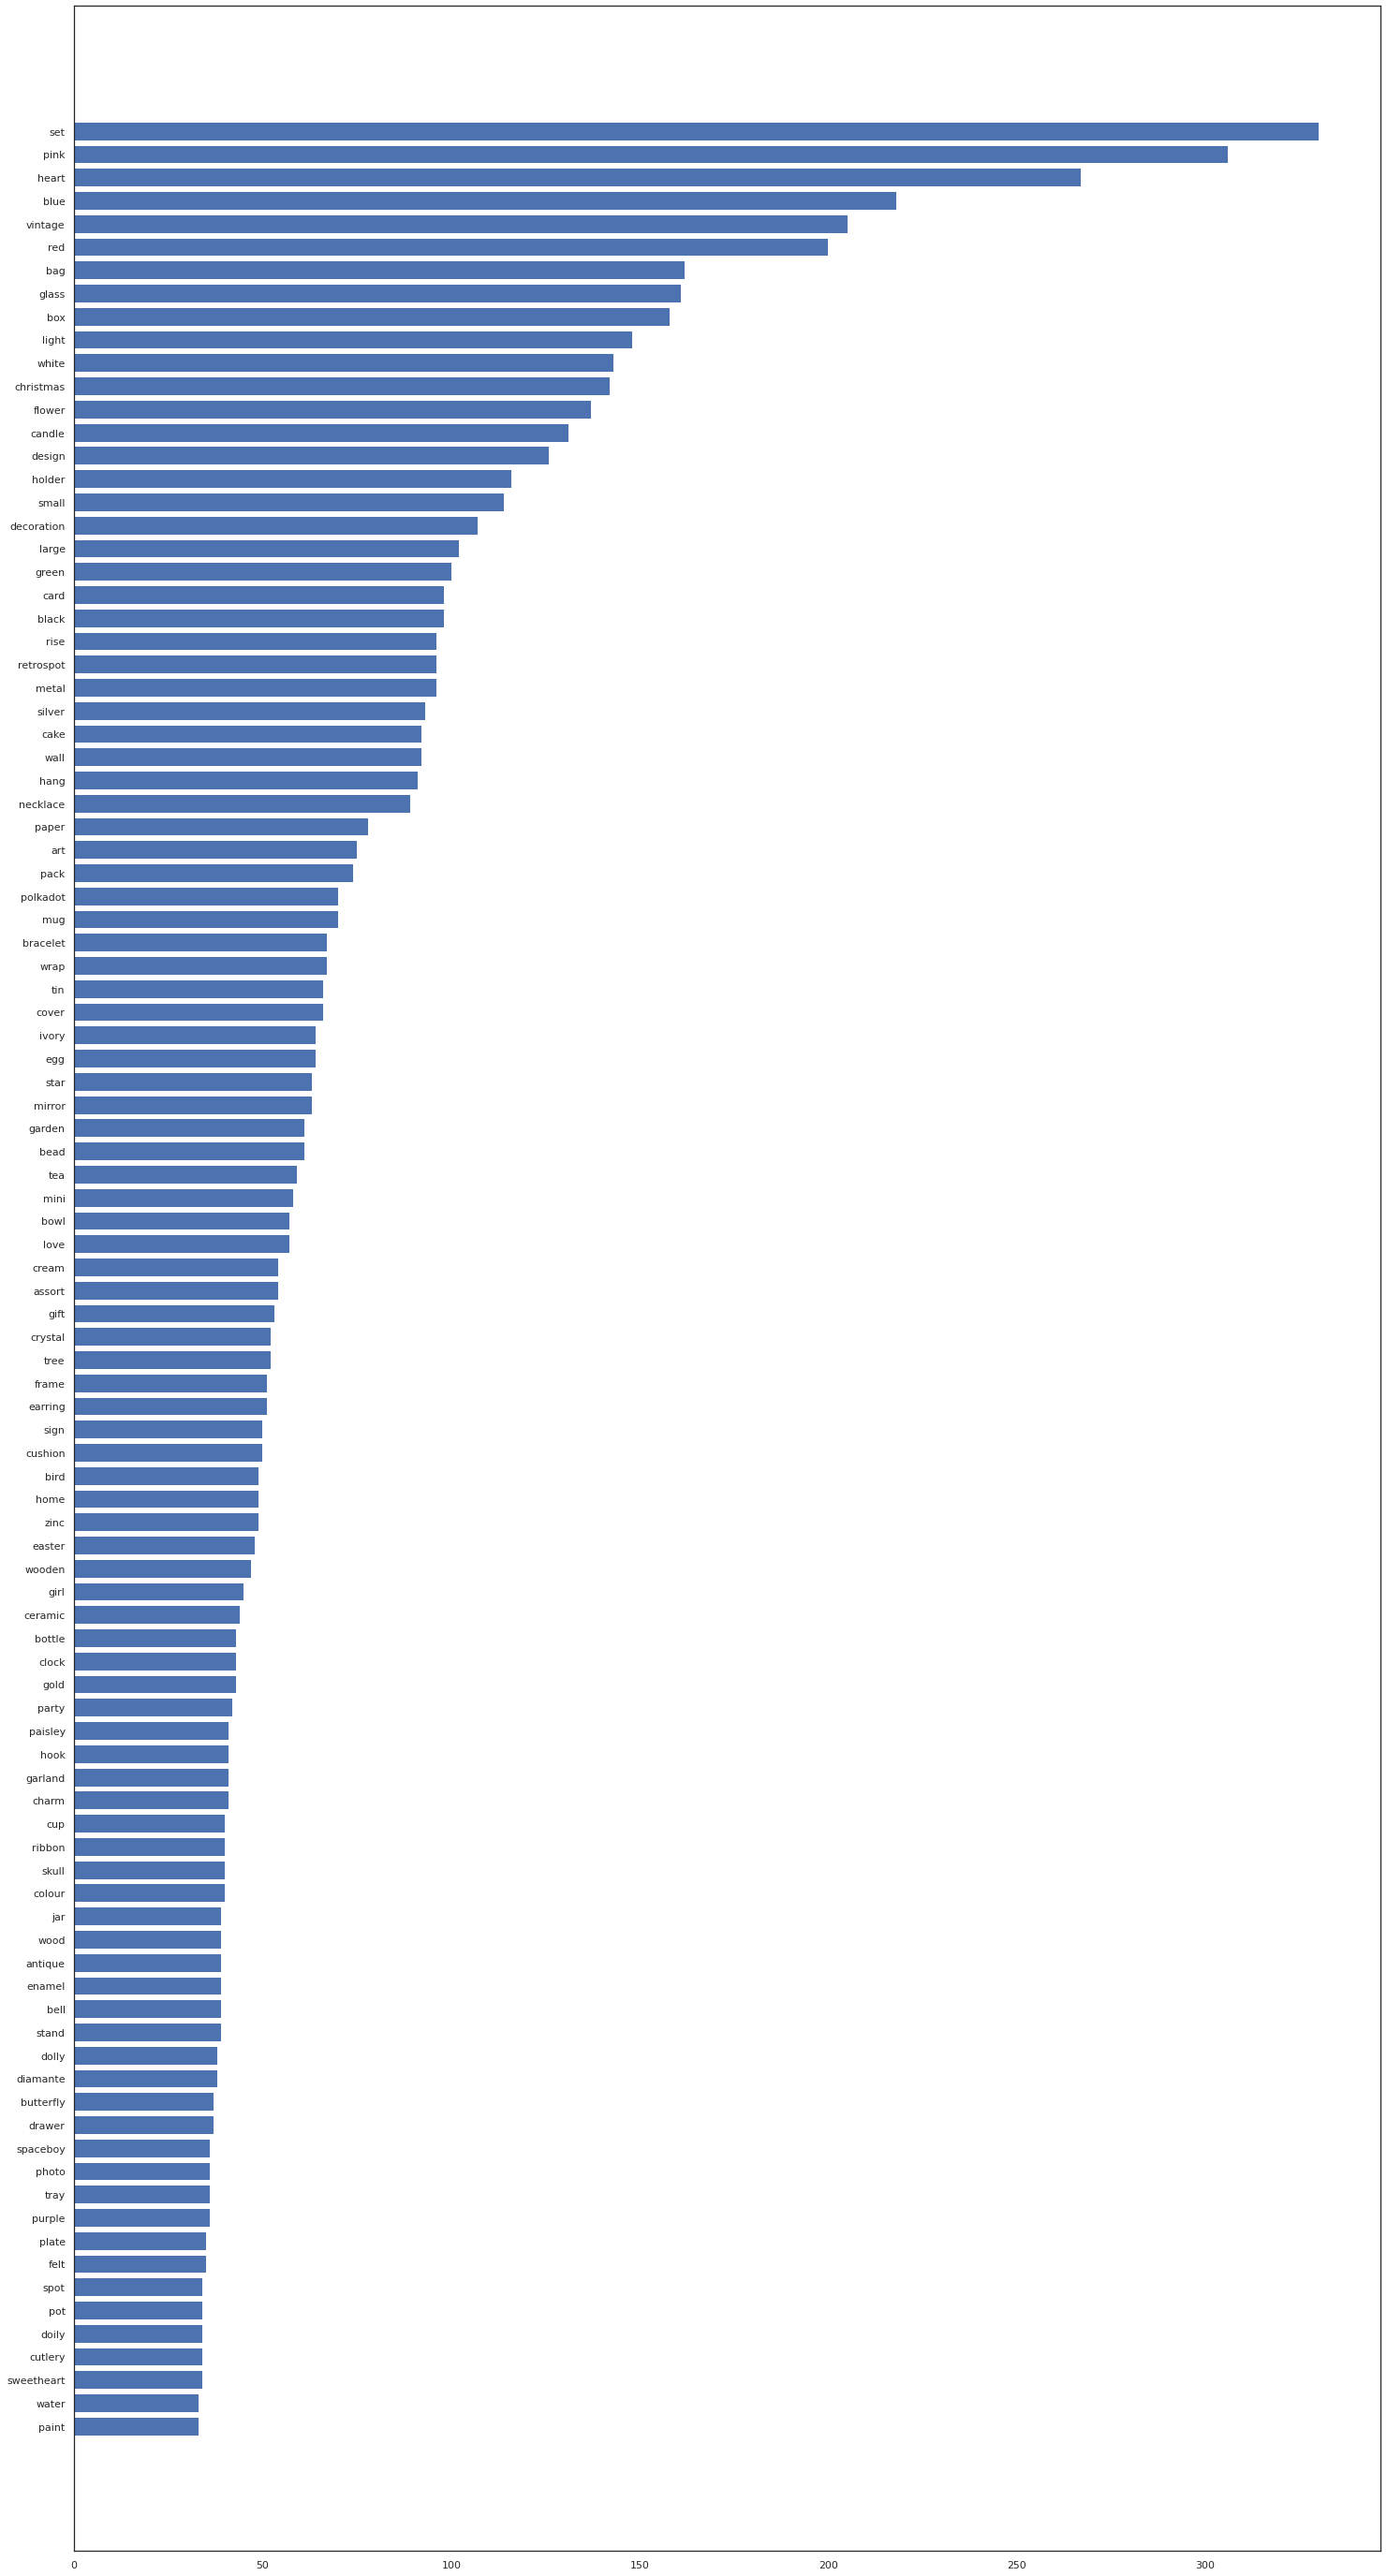

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist 
all_words_df = df1['processed_Description']
all_words = ' '.join([text for text in all_words_df])
all_words = all_words.split()
print(all_words)
words_df = FreqDist(all_words)
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
print(words_df)
words_df = words_df.nlargest(columns="count",n=100) 
words_df.sort_values('count', inplace = True)
plt.figure(figsize=(25,50))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

Word Cloud

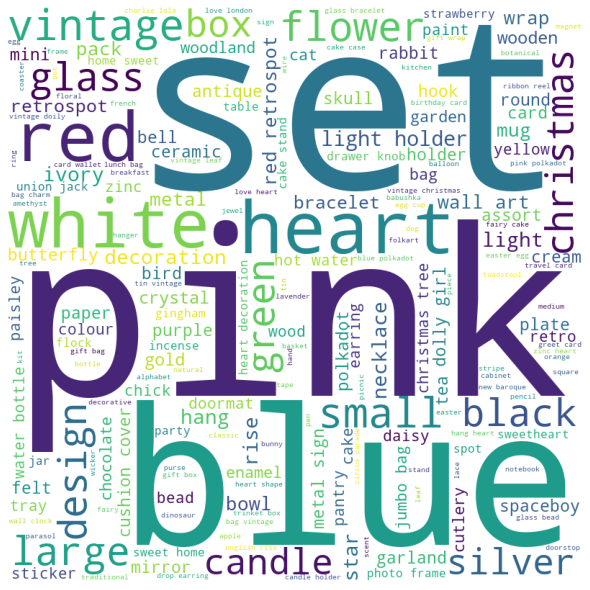

In [28]:
## Bilding a Word Cloud
from wordcloud import WordCloud

all_words = ' '.join([text for text in df1['processed_Description']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

Bag of words model

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Step 1: Design the Vocabulary
count_vectorizer = CountVectorizer(binary = True) 

# Step 2: Create the Bag-of-Words Model
bag_of_words = count_vectorizer.fit_transform(df1['processed_Description']) 

# Bag-of-Words Model as a pandas DataFrame
feature_names = count_vectorizer.get_feature_names()
df2 = pd.DataFrame(bag_of_words.toarray(), columns = feature_names)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
df2

,abc,abstract,acapulco,account,acrylic,address,ade,adult,advent,afghan,...,world,woven,wrap,wreath,wreck,write,xmas,yellow,yuletide,zinc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3749,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3751,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3752,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
X = bag_of_words.toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')

from warnings import filterwarnings
filterwarnings('ignore')

k-means algorithm

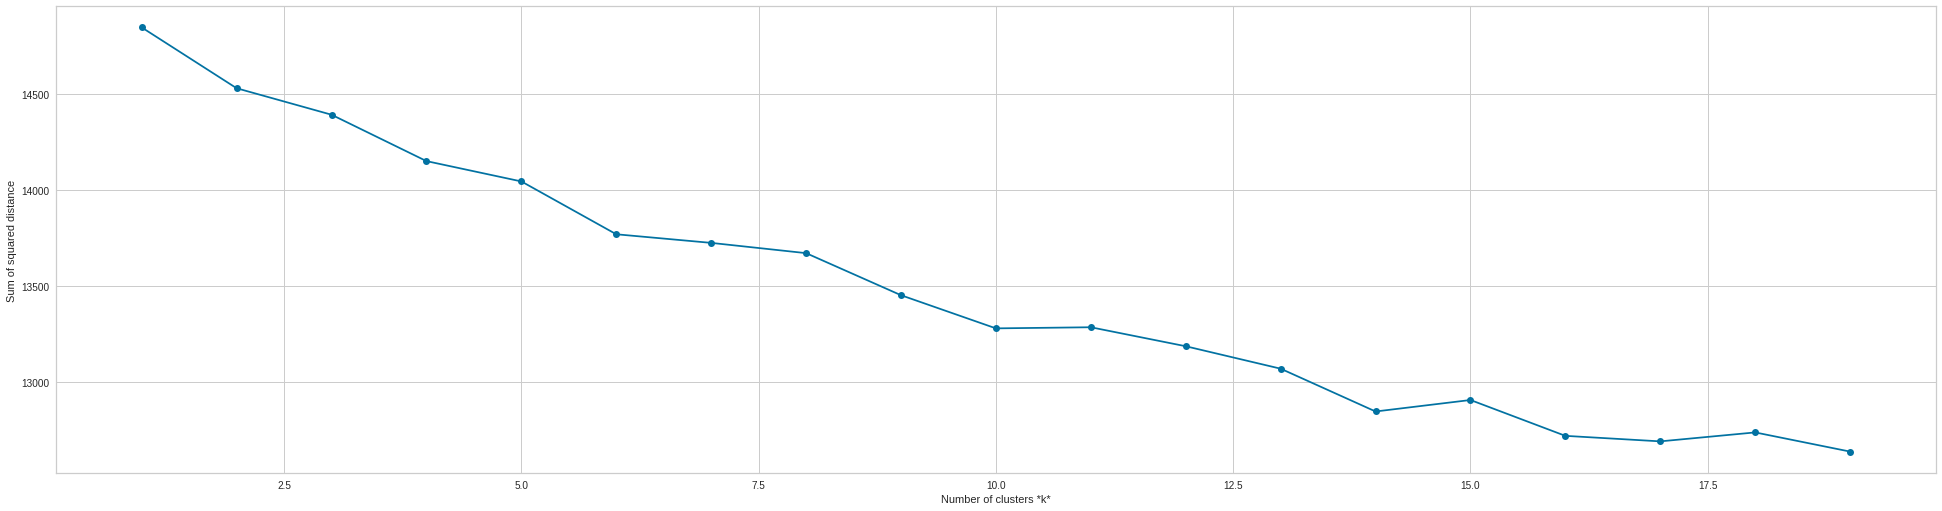

In [51]:
from sklearn.cluster import KMeans

list_k = list(range(1, 20))
inertias = []
for k in list_k:
    km = KMeans(n_clusters = k)
    km.fit(X)
    inertias.append(km.inertia_)

# Plotting
plt.figure(figsize=(30, 8))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance'); 

PCA - Principal component analysis

In [34]:
from sklearn.decomposition import PCA
# finding the optimum number of components:
components = None
pca = PCA(n_components = components)  # components - hyperparameter
pca.fit(X)

PCA()

In [35]:
# printing the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)

Variances (Percentage):
[2.23644664e+00 1.94046509e+00 1.88344372e+00 ... 6.54860317e-34
 4.86078847e-34 2.54912696e-34]


In [36]:
# printing the cumulative variances
print("Cumulative Variances (Percentage):")
print((pca.explained_variance_ratio_.cumsum() * 100))

Cumulative Variances (Percentage):
[  2.23644664   4.17691173   6.06035545 ... 100.         100.
 100.        ]


Text(0, 0.5, 'Explained variance (%)')

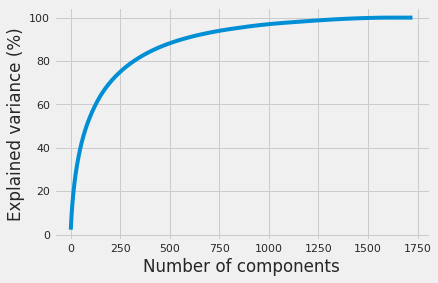

In [37]:
# plot a scree plot
import numpy as np
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))

plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Number of components: 416


Text(0, 0.5, 'Explained variance (%)')

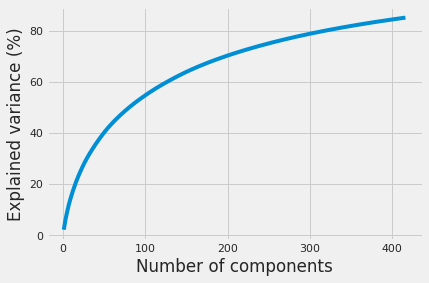

In [38]:

# choosing only 85% of variations:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.85)
pca.fit(X)

# optimum no:of components
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')

# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [39]:
from sklearn.decomposition import PCA
pca = PCA(422)
PCA_data = pca.fit_transform(X)
PCA_data.shape 

(3754, 422)

# Elbow plot

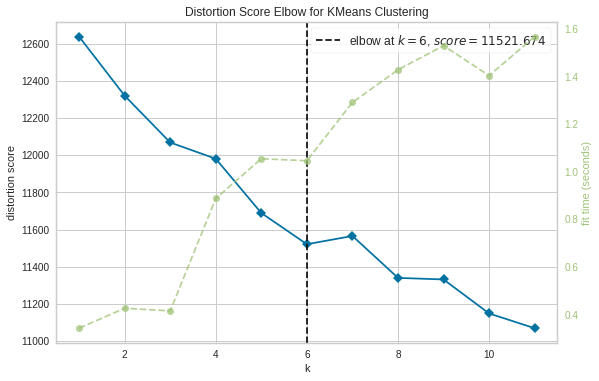

In [40]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,12)).fit(PCA_data)
visualizer.show()

In [52]:
km = KMeans(n_clusters=6,init="k-means++",random_state=42) # applying k = 4
km.fit(PCA_data)                 # fit the data

centroids = km.cluster_centers_  # centroid points
print("centroids: \n",centroids)

print("\ninertia: ",km.inertia_)  # measures how tight my groups are

centroids: 
 [[-2.11496399e-02 -1.10585344e-01 -7.62566777e-02 ... -7.33218944e-07
   6.09388628e-05  5.70199892e-05]
 [-2.89030277e-01  1.66934444e-02  8.08347845e-01 ... -1.19739247e-03
  -6.36525603e-04 -4.44687903e-04]
 [-4.26073751e-01  8.02640209e-01 -2.23849007e-01 ...  8.22853242e-04
  -2.68496770e-04  2.14946121e-04]
 [-9.95686958e-02 -1.60162319e-01 -1.43473796e-01 ... -2.86007572e-04
   2.49923694e-04 -5.53987273e-04]
 [ 1.14388789e-01  7.60686338e-02  4.67704823e-01 ...  1.14106076e-03
   2.96634838e-04  6.98494708e-04]
 [ 8.58409404e-01  3.28679004e-01  1.17305435e-01 ...  5.03976423e-06
  -1.39733676e-04 -8.44668516e-05]]

inertia:  11521.674143671524


In [53]:
km.labels_ 

array([4, 3, 1, ..., 2, 4, 0], dtype=int32)

In [54]:
#predict the labels of clusters
label = km.fit_predict(PCA_data)  
print(label)

[4 3 1 ... 2 4 0]


#Visualizing the Clusters

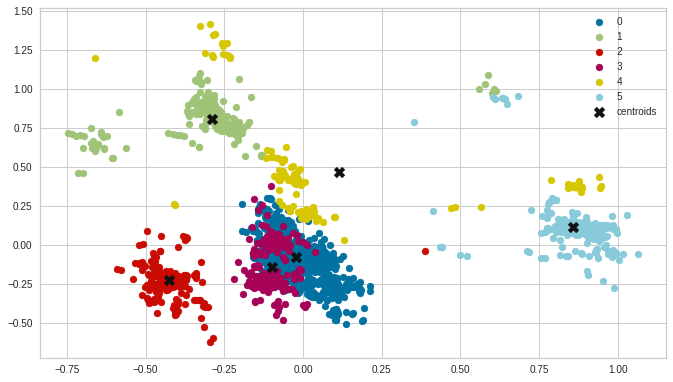

In [55]:
centroids = km.cluster_centers_   # Getting the Centroids
u_labels = np.unique(label)      # Getting the labels
 
# plotting the results:
plt.figure(figsize=(10, 6)) 
for i in u_labels:
    plt.scatter(PCA_data[label == i , 0] , PCA_data[label == i , 2] , label = i)
plt.scatter(centroids[:,0] , centroids[:,2] , marker="X", c="k", s=120, label="centroids")
plt.legend()
plt.show()

In [56]:
# creating a dataframe for the cluster labels:
df_cluster = pd.DataFrame(km.labels_)
print(df_cluster.shape)
df_cluster

(3754, 1)


,0
0,4
1,3
2,1
3,0
4,1
...,...
3749,5
3750,5
3751,2
3752,4


In [57]:
print(df1.shape)
df1

(3754, 1)


,processed_Description
0,white hang heart light holder
1,white metal lantern
2,cream cupid heart coat hanger
3,knit union flag hot water bottle
4,red woolly hottie white heart
...,...
3749,set ribbon perfectly pretty
3750,set ribbon party
3751,pink crystal skull phone charm
3752,cream hang heart light holder


In [62]:
df1 = df1.reset_index(drop=True)

df2 = df1.join(df_cluster)

df2.rename(columns={0:'Cluster'},inplace=True)

In [63]:
# merging the "product clusters" with the original dataframe:
df3 = pd.merge(df, df2, how='left', on ='processed_Description')
df3

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,processed_Description,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,white hang heart light holder,4
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,white metal lantern,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,cream cupid heart coat hanger,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,knit union flag hot water bottle,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,red woolly hottie white heart,1
...,...,...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,pack spaceboy napkin,0
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,child apron dolly girl,0
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,childrens cutlery dolly girl,0
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,childrens cutlery circus parade,0


One-hot Encoding for Product 

In [64]:
df4 = pd.get_dummies(df3,columns=["Cluster"])
df4

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,processed_Description,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,white hang heart light holder,0,0,0,0,1,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,white metal lantern,0,0,0,1,0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,cream cupid heart coat hanger,0,1,0,0,0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,knit union flag hot water bottle,1,0,0,0,0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,red woolly hottie white heart,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,pack spaceboy napkin,1,0,0,0,0,0
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,child apron dolly girl,1,0,0,0,0,0
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,childrens cutlery dolly girl,1,0,0,0,0,0
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,childrens cutlery circus parade,1,0,0,0,0,0


In [65]:
# copying the dataframe into another variable:
df5 = df4.copy()

In [66]:
# Dropping unnecessary features:
df5 = df5.drop(["Description","InvoiceDate","processed_Description"],axis=1)
df5

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5
0,536365,85123A,6,2.55,17850.0,United Kingdom,0,0,0,0,1,0
1,536365,71053,6,3.39,17850.0,United Kingdom,0,0,0,1,0,0
2,536365,84406B,8,2.75,17850.0,United Kingdom,0,1,0,0,0,0
3,536365,84029G,6,3.39,17850.0,United Kingdom,1,0,0,0,0,0
4,536365,84029E,6,3.39,17850.0,United Kingdom,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
406824,581587,22613,12,0.85,12680.0,France,1,0,0,0,0,0
406825,581587,22899,6,2.10,12680.0,France,1,0,0,0,0,0
406826,581587,23254,4,4.15,12680.0,France,1,0,0,0,0,0
406827,581587,23255,4,4.15,12680.0,France,1,0,0,0,0,0


One-hot Encoding for Country

In [67]:
df6 = pd.get_dummies(df5,columns=["Country"])
df6

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,536365,85123A,6,2.55,17850.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,536365,71053,6,3.39,17850.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,536365,84406B,8,2.75,17850.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,536365,84029G,6,3.39,17850.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,536365,84029E,6,3.39,17850.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406824,581587,22613,12,0.85,12680.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
406825,581587,22899,6,2.10,12680.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
406826,581587,23254,4,4.15,12680.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
406827,581587,23255,4,4.15,12680.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Label Encoding for CustomerID

In [68]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder() # label_encoder object knows how to understand word labels.
 
df6['CustomerID']= label_encoder.fit_transform(df6['CustomerID'])
df6

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,536365,85123A,6,2.55,4048,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,536365,71053,6,3.39,4048,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,536365,84406B,8,2.75,4048,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,536365,84029G,6,3.39,4048,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,536365,84029E,6,3.39,4048,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406824,581587,22613,12,0.85,275,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
406825,581587,22899,6,2.10,275,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
406826,581587,23254,4,4.15,275,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
406827,581587,23255,4,4.15,275,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df6.shape

(406829, 48)

In [70]:
df7 = df6.groupby(['CustomerID']).mean()
df7    

,Quantity,UnitPrice,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Country_Australia,Country_Austria,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
CustomerID,,,,,,,,,,,,,,,,,,,,,
0,0.000000,1.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,13.505495,2.644011,0.648352,0.054945,0.071429,0.016484,0.065934,0.142857,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,75.516129,5.764839,0.741935,0.064516,0.064516,0.032258,0.000000,0.096774,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.643836,8.289041,0.630137,0.109589,0.013699,0.013699,0.041096,0.191781,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11.588235,3.841176,0.823529,0.000000,0.058824,0.117647,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,4.500000,4.765000,0.800000,0.000000,0.000000,0.100000,0.000000,0.100000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4368,7.714286,5.622857,0.714286,0.000000,0.000000,0.000000,0.000000,0.285714,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4369,7.538462,4.821538,0.846154,0.000000,0.076923,0.000000,0.000000,0.076923,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [71]:
df7.describe()
     

,Quantity,UnitPrice,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Country_Australia,Country_Austria,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,...,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,22.389288,7.978608,0.667320,0.071154,0.043074,0.057384,0.054534,0.106534,0.001902,0.002119,...,0.000229,0.000229,0.000229,0.006782,0.001830,0.004670,0.000915,0.000457,0.903477,0.000915
std,213.257466,144.963315,0.162938,0.094104,0.059728,0.080422,0.098867,0.104466,0.042445,0.045451,...,0.015124,0.015124,0.015124,0.081589,0.042742,0.067696,0.030237,0.021386,0.295341,0.030237
min,-144.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.475745,2.221431,0.588235,0.000000,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,9.494392,2.944581,0.677485,0.043478,0.028771,0.040664,0.025950,0.090909,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,14.008333,3.897209,0.758621,0.100000,0.062500,0.076923,0.066667,0.152885,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,12540.000000,8055.780000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
y = df7.to_numpy()

Scaling

In [73]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = MinMaxScaler()
y_scaled = sc.fit_transform(y)

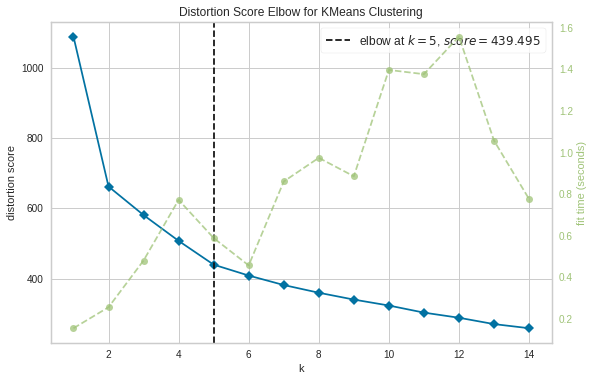

In [74]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=9)
visualizer = KElbowVisualizer(model, k=(1,15)).fit(y_scaled)
visualizer.show()

K-Means Clustering

In [76]:

km = KMeans(n_clusters = 5, init= "k-means++", random_state = 10)     # applying k = 4
km.fit(y_scaled)          # fit the data - identify pattern, does everything

centroids = km.cluster_centers_   # final centroid points

# print("centroids: ",centroids)
print("inertia: ",km.inertia_) 

inertia:  439.4951455017822


In [77]:
km.labels_ 

array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

In [78]:
label = km.fit_predict(y_scaled)  
print(label)

[0 1 1 ... 0 0 0]


Visualizing the Customer Cluster

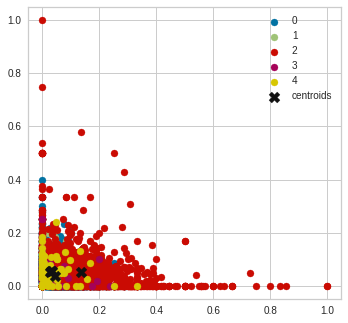

In [79]:
# Getting the Centroids and Cluster labels
centroids = km.cluster_centers_
labels = np.unique(label)

# 2D plotting
plt.figure(figsize=(5, 5)) 
for i in labels:
    plt.scatter(y_scaled[label == i , 3] , y_scaled[label == i , 4] , label = i)
plt.scatter(centroids[:,3] , centroids[:,4] , marker="X", c="k", s=120, label="centroids")
plt.legend()
plt.show()

In [80]:
df8 = pd.DataFrame(label) # creating a dataframe for the "customer clusters"

df8.reset_index(level=0, inplace=True) # creating the "customerID" column

df8.rename(columns={'index':'CustomerID', 0:'Customer cluster'},inplace=True) # renaming the columns

df8.head()

,CustomerID,Customer cluster
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


In [81]:
# count of each clusters
df9 = df8.groupby("Customer cluster").count()
df9
    

,CustomerID
Customer cluster,
0,2673
1,240
2,1277
3,87
4,95


Plotting Customer Clusters

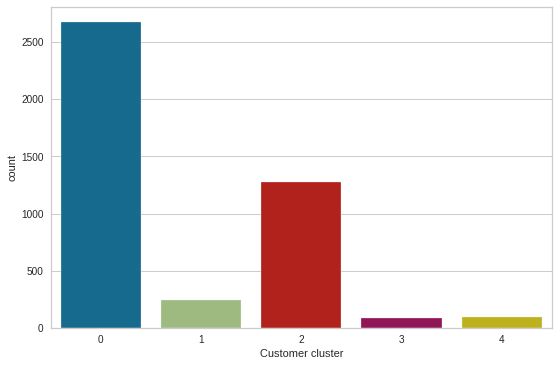

In [82]:
# check the number of clusters and number of CUSTOMERS in each cluster
import seaborn as sns
sns.countplot(df8["Customer cluster"])

INTERPRETATION:

cluster-0 contains the maximum number of Customers, followed by cluster-2
cluster-1,3 and 4 contains the least number of Customers.

Conclusion

Thus we have grouped Similar Customers based on:

Products they bought

Quantity and Price of the purchase

Country of origin of the customers

We have found that the customers can be segmented into 5 buckets, based on their similarity.